# Welcome to Notebook 1 of the HELINA Workshop

## This notebook will wrangle data tables from the BAIS 2013 report and store as dataframes

### We will be using a Python module called Camelot-Py which allows us to wrangle data from PDF documents

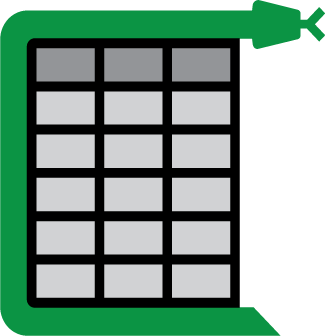

In [2]:
## import the needed python modules to wrangle data from the BAIS 2013 PDF report

In [3]:
import pandas as pd   # Pandas is a data-management swiss army knife ---that has utility for data frames

In [4]:
import camelot  # Camelot-py is a python module for wrangling data tables from PDF documents

## The Camelot-py module uses two different methods to wrangle data tables...

## Lattice is a method that Camelot uses to wrangle tables with dark lined cell boundaries.

## Stream is a method that Camelot uses to wrangle tables with no lines or white space

## We will wrangle 1 data table from the Population & Housing Census 2011 Report.

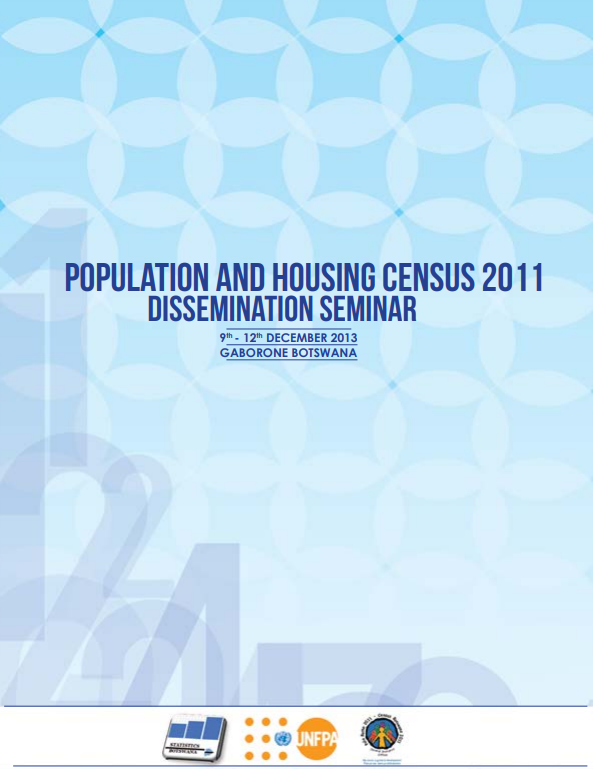

### The first table we need to wrangle is Table 5 on page 32 of the report.

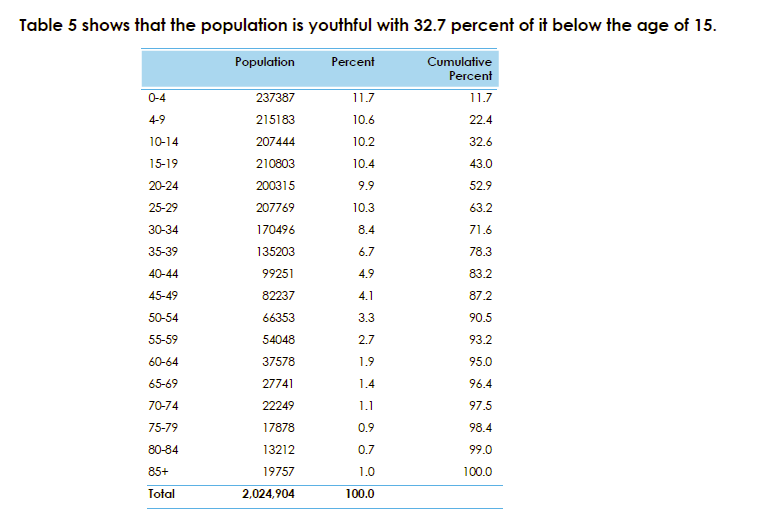

## Notice that the report contains tables with white cell boundaries or no boundaries

### This means that we will need to use the parameter of flavor = 'stream' so that we use the Stream method.

### We will use the flavor = 'stream' method within Camelot for each of the 3 tables that we wrangle.

In [5]:
wrangletableCensusPop = camelot.read_pdf('./resources/Population-and-Housing-Census-2011.pdf', flavor='stream', pages='32')
wrangletableCensusPop[0].df
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


In [6]:
wrangletableCensusPop

<TableList n=2>

In [7]:
wrangletableCensusPop.export('outputs/CensusPop.csv', f='csv', compress=True) #json, excel, html

In [8]:
wrangletableCensusPop[0].parsing_report

{'accuracy': 99.35, 'whitespace': 3.97, 'order': 1, 'page': 32}

In [9]:
wrangletableCensusPop[0].df

,0,1,2,3,4,5
0,Table 3: Population and Percentage Distributio...,,,,,
1,Age,Male,Percent,Female,Percent,Total
2,0-4,120046,50.6,117341,49.4,237387
3,5-9,108561,50.5,106622,49.5,215183
4,10-14,104468,50.4,102976,49.6,207444
5,15 -19,104847,49.7,105956,50.3,210803
6,20-24,97270,48.6,103045,51.4,200315
7,25-29,101193,48.7,106576,51.3,207769
8,30-34,84507,49.6,85989,50.4,170496
9,35-39,68438,50.6,66765,49.4,135203


### Notice that the top rows of the dataframe are not the field names and need to be dropped

In [10]:
droprowstableCensusPop = wrangletableCensusPop[0].df

In [11]:
tableCensusPop = droprowstableCensusPop.drop([0,1,20])

In [12]:
tableCensusPop

,0,1,2,3,4,5
2,0-4,120046,50.6,117341,49.4,237387
3,5-9,108561,50.5,106622,49.5,215183
4,10-14,104468,50.4,102976,49.6,207444
5,15 -19,104847,49.7,105956,50.3,210803
6,20-24,97270,48.6,103045,51.4,200315
7,25-29,101193,48.7,106576,51.3,207769
8,30-34,84507,49.6,85989,50.4,170496
9,35-39,68438,50.6,66765,49.4,135203
10,40-44,48757,49.1,50494,50.9,99251
11,45-49,37879,46.1,44358,53.9,82237


In [14]:
print(tableCensusPop.dtypes)

AgeGroup     object
MalePop      object
MalePct      object
FemalePop    object
FemalePct    object
Total        object
dtype: object


## next we will set the column names for the dataframe

In [15]:
tableCensusPop.columns = ['AgeGroup', 'MalePop', 'MalePct', 'FemalePop', 'FemalePct', 'Total']

#### We will print the column names to be sure that the dataframe columns are set

In [16]:
print(tableCensusPop.dtypes)

AgeGroup     object
MalePop      object
MalePct      object
FemalePop    object
FemalePct    object
Total        object
dtype: object


In [17]:
tableCensusPop['AgeGroup'] = tableCensusPop.AgeGroup.astype(str)
tableCensusPop['MalePop'] = tableCensusPop.MalePop.astype(int)
tableCensusPop['MalePct'] = tableCensusPop.MalePct.astype(float)
tableCensusPop['FemalePop'] = tableCensusPop.FemalePop.astype(int)
tableCensusPop['FemalePct'] = tableCensusPop.FemalePct.astype(float)
tableCensusPop['Total'] = tableCensusPop.Total.astype(int)
print(tableCensusPop.dtypes)

AgeGroup      object
MalePop        int64
MalePct      float64
FemalePop      int64
FemalePct    float64
Total          int64
dtype: object


In [18]:
tableCensusPop['MalePop'] = tableCensusPop['MalePop']*-1

In [19]:
tableCensusPop

,AgeGroup,MalePop,MalePct,FemalePop,FemalePct,Total
2,0-4,-120046,50.6,117341,49.4,237387
3,5-9,-108561,50.5,106622,49.5,215183
4,10-14,-104468,50.4,102976,49.6,207444
5,15 -19,-104847,49.7,105956,50.3,210803
6,20-24,-97270,48.6,103045,51.4,200315
7,25-29,-101193,48.7,106576,51.3,207769
8,30-34,-84507,49.6,85989,50.4,170496
9,35-39,-68438,50.6,66765,49.4,135203
10,40-44,-48757,49.1,50494,50.9,99251
11,45-49,-37879,46.1,44358,53.9,82237


In [20]:
tableCensusPop['MalePct'] = tableCensusPop['MalePct']*-1

In [21]:
tableCensusPop

,AgeGroup,MalePop,MalePct,FemalePop,FemalePct,Total
2,0-4,-120046,-50.6,117341,49.4,237387
3,5-9,-108561,-50.5,106622,49.5,215183
4,10-14,-104468,-50.4,102976,49.6,207444
5,15 -19,-104847,-49.7,105956,50.3,210803
6,20-24,-97270,-48.6,103045,51.4,200315
7,25-29,-101193,-48.7,106576,51.3,207769
8,30-34,-84507,-49.6,85989,50.4,170496
9,35-39,-68438,-50.6,66765,49.4,135203
10,40-44,-48757,-49.1,50494,50.9,99251
11,45-49,-37879,-46.1,44358,53.9,82237


## Next, we will preserve this dataframe, using a technique called Pickling

#### We will store the dataframe in a "pickle" and this file can be read again and again in this notebook and other notebooks....

In [24]:
tableCensusPop.to_pickle('tableCensusPop_pickle.pkl')

#### Congratulations !  you have wrangled and pickled the first data table that we will use within this workshop !

## Next, we will wrangle 2 data tables from the BAIS 2013 PDF report 

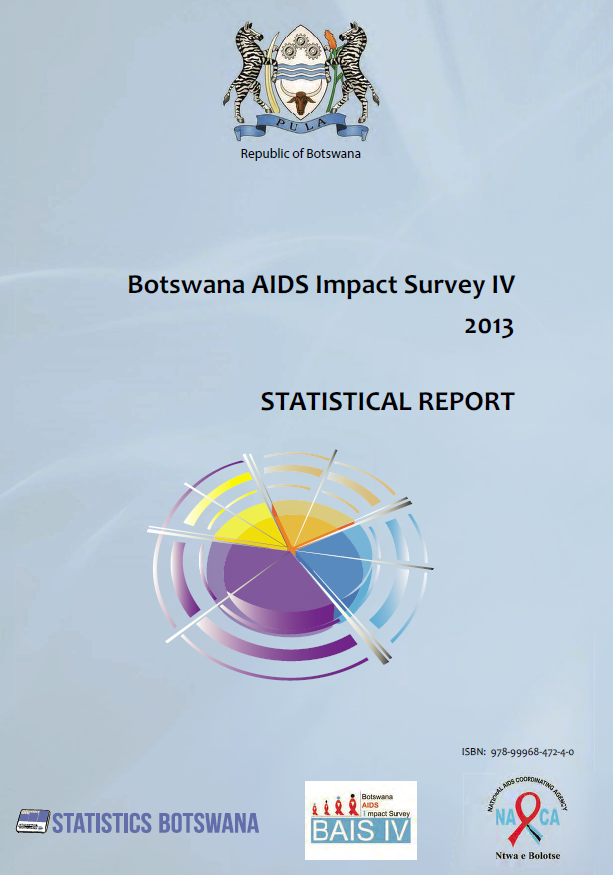

## We will repeat this process for Table 6 on page 40 of the BAIS 2013 report

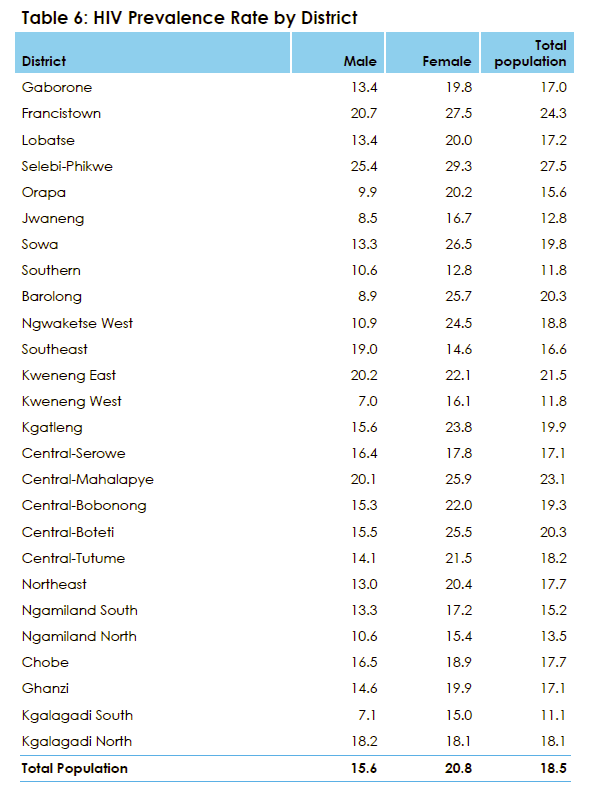

In [16]:
wrangletable6 = camelot.read_pdf('./resources/BAIS2013.pdf', flavor='stream', pages='40')
wrangletable6[0].df
%time

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs


In [17]:
wrangletable6

<TableList n=2>

In [18]:
wrangletable6.export('outputs/BAIS2013_table6.csv', f='csv', compress=True) #json, excel, html

In [19]:
wrangletable6[0].parsing_report

{'accuracy': 99.71, 'whitespace': 5.0, 'order': 1, 'page': 40}

In [20]:
wrangletable6[0].df

,0,1,2,3
0,Table 6: HIV Prevalence Rate by District,,,
1,,,,Total
2,District,Male,Female,population
3,Gaborone,13.4,19.8,17.0
4,Francistown,20.7,27.5,24.3
5,Lobatse,13.4,20.0,17.2
6,Selebi-Phikwe,25.4,29.3,27.5
7,Orapa,9.9,20.2,15.6
8,Jwaneng,8.5,16.7,12.8
9,Sowa,13.3,26.5,19.8


### Notice that the top 2 rows of the dataframe are not the field names and need to be dropped

In [21]:
droprowstable6 = wrangletable6[0].df

In [22]:
table6 = droprowstable6.drop([0,1,2])

In [23]:
table6

,0,1,2,3
3,Gaborone,13.4,19.8,17.0
4,Francistown,20.7,27.5,24.3
5,Lobatse,13.4,20.0,17.2
6,Selebi-Phikwe,25.4,29.3,27.5
7,Orapa,9.9,20.2,15.6
8,Jwaneng,8.5,16.7,12.8
9,Sowa,13.3,26.5,19.8
10,Southern,10.6,12.8,11.8
11,Barolong,8.9,25.7,20.3
12,Ngwaketse West,10.9,24.5,18.8


## next we will set the column names for the dataframe

In [24]:
table6.columns = ['District', 'Male', 'Female', 'TotalPop']

#### We will print the column names to be sure that the dataframe columns are set

In [25]:
for col in table6.columns: 
    print(col) 

District
Male
Female
TotalPop


In [26]:
table6

,District,Male,Female,TotalPop
3,Gaborone,13.4,19.8,17.0
4,Francistown,20.7,27.5,24.3
5,Lobatse,13.4,20.0,17.2
6,Selebi-Phikwe,25.4,29.3,27.5
7,Orapa,9.9,20.2,15.6
8,Jwaneng,8.5,16.7,12.8
9,Sowa,13.3,26.5,19.8
10,Southern,10.6,12.8,11.8
11,Barolong,8.9,25.7,20.3
12,Ngwaketse West,10.9,24.5,18.8


## Next, we will preserve this dataframe, using a technique called Pickling

#### We will store the dataframe in a "pickle" and this file can be read again and again in this notebook and other notebooks....

In [27]:
table6.to_pickle('table6pickle.pkl')

#### Congratulations !  you have wrangled and pickled the second data table that we will use within this workshop !

## Next, we will repeat this process for Table 3 on page 46 of the BAIS 2013 report

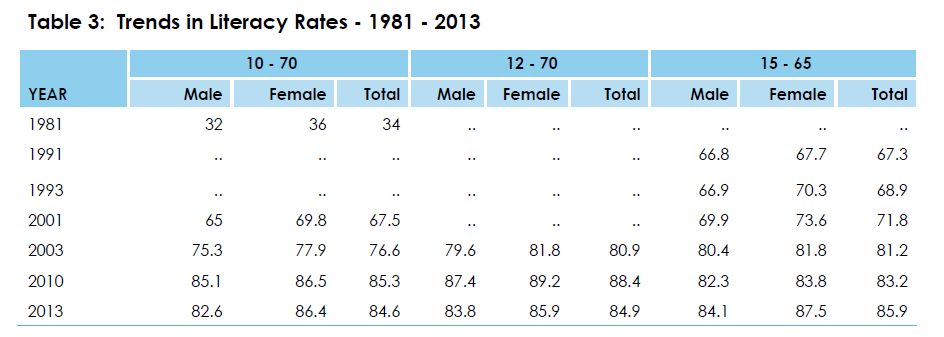

In [28]:
wrangletable3 = camelot.read_pdf('./resources/BAIS2013.pdf', flavor='stream', pages='46')
wrangletable3[0].df
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [29]:
wrangletable3

<TableList n=1>

In [30]:
wrangletable3.export('outputs/BAIS2013_table3.csv', f='csv', compress=True) #json, excel, html

In [31]:
wrangletable3[0].parsing_report

{'accuracy': 98.0, 'whitespace': 22.73, 'order': 1, 'page': 46}

In [32]:
wrangletable3[0].df

,0,1,2,3,4,5,6,7,8,9
0,percent from the 2009/10 Botswana Core Welfare...,,,,,,,,,
1,,Table 3: Trends in Literacy Rates - 1981 - 2013,,,,,,,,
2,,,10 - 70,,,12 - 70,,,15 - 65,
3,YEAR,Male,Female,Total,Male,Female,Total,Male,Female,Total
4,1981,32,36,34,..,..,..,..,..,..
5,1991,..,..,..,..,..,..,66.8,67.7,67.3
6,1993,..,..,..,..,..,..,66.9,70.3,68.9
7,2001,65,69.8,67.5,..,..,..,69.9,73.6,71.8
8,2003,75.3,77.9,76.6,79.6,81.8,80.9,80.4,81.8,81.2
9,2010,85.1,86.5,85.3,87.4,89.2,88.4,82.3,83.8,83.2


### We will use only the last 3 rows of the data for 2003, 2010, and 2013.  The other rows will be dropped

In [33]:
droprowstable3 = wrangletable3[0].df

In [34]:
table3 = droprowstable3.drop([0,1,2,3,4,5,6,7])

In [35]:
table3

,0,1,2,3,4,5,6,7,8,9
8,2003,75.3,77.9,76.6,79.6,81.8,80.9,80.4,81.8,81.2
9,2010,85.1,86.5,85.3,87.4,89.2,88.4,82.3,83.8,83.2
10,2013,82.6,86.4,84.6,83.8,85.9,84.9,84.1,87.5,85.9


## next we will set the column names for the dataframe

In [36]:
table3.columns = ['Year', 'Male1070', 'Female1070', 'Total1070', 'Male1270', 'Female1270', 'Total1270', 'Male1565', 'Female1565', 'Total1565']

#### We will print the column names to be sure that the dataframe columns are set

In [37]:
for col in table3.columns: 
    print(col) 

Year
Male1070
Female1070
Total1070
Male1270
Female1270
Total1270
Male1565
Female1565
Total1565


In [38]:
table3

,Year,Male1070,Female1070,Total1070,Male1270,Female1270,Total1270,Male1565,Female1565,Total1565
8,2003,75.3,77.9,76.6,79.6,81.8,80.9,80.4,81.8,81.2
9,2010,85.1,86.5,85.3,87.4,89.2,88.4,82.3,83.8,83.2
10,2013,82.6,86.4,84.6,83.8,85.9,84.9,84.1,87.5,85.9


## Next, we will preserve this dataframe, using a technique called Pickling

#### We will store the dataframe in a "pickle" and this file can be read again and again in this notebook and other notebooks....

In [39]:
table3.to_pickle('table3pickle.pkl')

## Congratulations !  you have wrangled and pickled each of the 3 data tables that we will use within this workshop !   You are done with this notebook and will now proceed to Notebook 2.